# Assignment 7: Semantic Segmentation
Gruppe 2: Albrecht Oster, Linus Helfmann

Heute werden wir einfache Netzwerkarchitekturen für "Semantic Segmentation" testen. Ziel ist es dieses Paper in den Grundzügen zu implementieren: https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf. Bitte lesen!

## Daten

Es gibt einige gute Datensätze, die ihr (bei gegebener Hardware) herunterladen und benutzen könnt. Für diejenigen, die auf CPUs rechnen gilt immer der Tip: Bilder downsamplen!

Sucht Euch einen Satensatz aus: 

KITTI: http://www.cvlibs.net/download.php?file=data_semantics.zip (~300 MB, 200 Bilder)

DUS: http://www.6d-vision.com/scene-labeling (~3 GB, 500 Bilder)

MIT. http://sceneparsing.csail.mit.edu/ (~1 GB, links siehe auf Seite)

## Exc. 7.1 Fully convolutional network, no downsampling
Implementiere die in der Vorlesung besprochene Netzwerkarchitektur von aufeinanderfolgenden CONV-Schichten (stride=1, mit zero-padding), um eine Ausgabeschicht zu bekommen, die die Eingabegröße aufweist. Tip: die letzte CONV-Schicht sollte eine Tiefe haben, die zur Zahl der Klassen korrespondiert. Benutze den L2-Loss zum Labelbild (Achtung: ihr müsst dafür entweder das Labelbild oder den Ausgabetensor umformulieren).

Trainiere das Netzwerk auf den von Dir gewählten Datensatz und zeige den Verlauf des Losses, und einige zufällig gewählte Beispielbilder mit ihren vorhergesagten Segmentierungen an. (**RESULT**)

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks as callbacks
import numpy as np
import matplotlib.pyplot as plt

image_generator = ImageDataGenerator()
label_generator = ImageDataGenerator()

# Beispiel für den KITTI-Datensatz. Ich habe die 200 training samples 
# in 180 train- und 20 testbilder geteilt
# um uns das Leben leichter zu machen, Bilder heruntersamplen
# 1242*375
img_size = (76, 250)

# Bild- und Label-Generator
train_images = image_generator.flow_from_directory( 'kitti/train/images',
                                        class_mode = None,
                                        batch_size=1,
                                        target_size=img_size, seed=1)

train_label = label_generator.flow_from_directory( 'kitti/train/semantic_rgb',
                                       
                                         class_mode = None,
                                        batch_size=1,
                                        target_size=img_size, seed=1)

test_images = image_generator.flow_from_directory( 'kitti/test/images',
                                        class_mode = None,
                                        batch_size=1,
                                        target_size=img_size, seed=1)

test_label = label_generator.flow_from_directory( 'kitti/test/semantic_rgb',
                                       
                                         class_mode = None,
                                        batch_size=1,
                                        target_size=img_size, seed=1)

# kombinieren
train_generator = zip(train_images, train_label)
test_generator = zip(test_images, test_label)

C:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 180 images belonging to 1 classes.
Found 180 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


In [2]:
class LossCallback(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.x = []
        self.i = 0

    def on_epoch_end(self, epoch, logs={}):
        self.loss.append(logs.get('loss'))
        self.x.append(self.i)
        self.i += 1

In [3]:
from keras.models import Sequential
from keras.layers import Activation, Conv2D, ZeroPadding2D
from keras.optimizers import RMSprop

model = Sequential()
model.add(ZeroPadding2D((2,2),input_shape=img_size + (3,)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(15, (5, 5), activation='relu')) # k für k Klassen (k=15)
model.add(Conv2D(3, (1, 1), activation='relu')) #3 für RGB
model.compile(optimizer=RMSprop(lr=0.0001), loss='mean_squared_error', \
                          metrics=['accuracy'])
#model.summary()

In [4]:
lossCallback = LossCallback()

In [5]:
model.fit_generator(train_generator, steps_per_epoch = 200, epochs = 50, \
                                callbacks= [lossCallback])

Epoch 1/50
200/200 [==============================] - 35s 173ms/step - loss: 23899.9769 - acc: 0.3061
Epoch 10/50
200/200 [==============================] - 30s 149ms/step - loss: 5472.5188 - acc: 0.4222
Epoch 20/50
200/200 [==============================] - 30s 151ms/step - loss: 4157.8261 - acc: 0.5214
Epoch 30/50
200/200 [==============================] - 30s 151ms/step - loss: 3808.9763 - acc: 0.5536
Epoch 40/50
200/200 [==============================] - 31s 154ms/step - loss: 3314.8783 - acc: 0.5982
Epoch 50/50
200/200 [==============================] - 30s 151ms/step - loss: 2941.7265 - acc: 0.6217


In [6]:
predict_label = model.predict_generator(test_images)

In [10]:
from random import randint

def LabelToImage(image):
    return image/(max(image.max(),255.0))

def showImage(test_label,predict_label,n):
    for i in range(n):
        k = randint(0,len(test_label)-1)
        plt.subplot(n, 2, 2*i+1).imshow(LabelToImage(test_label[k][0]))
        plt.subplot(n, 2, 2*i+2).imshow(LabelToImage(predict_label[k]))
    
def evaluation(lossCallback):
    plt.plot(lossCallback.x, lossCallback.loss)

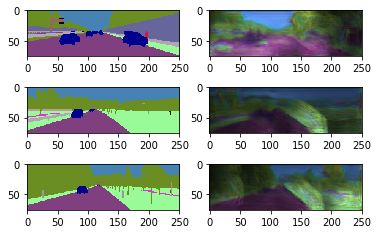

In [11]:
showImage(test_label,predict_label,3)

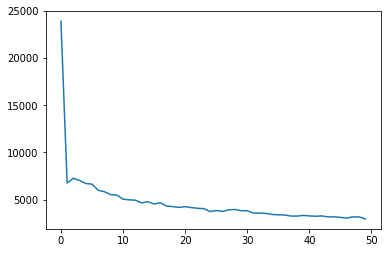

In [12]:
evaluation(lossCallback)

# Exc. 7.2 FCN mit Bottleneck

Implementiere jetzt die Variante mit schrittweisem Down- und Upsampling, wie in der Vorlesung besprochen. Nutze dafür ein bestehendes Netzwerk (z.B. VGG16, https://keras.io/applications/#vgg16), entferne die FC-Schichten am Ende, und füge dann die Upsampling-Schichten hinzu. Wie in der vorigen Vorlesung zu Transfer Learning beschrieben, kannst Du jetzt nur den zweiten Teil trainieren und die Gewichte des ersten Teils "einfrieren".

Stelle wie oben den Verlauf des Losses dar und wähle einige Beispielbilder aus dem Testset und zeige sie mit ihrer vorhergesagten Segmentierung an. (**BONUS**)

In [23]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Conv2DTranspose, Conv2D
import numpy as np

base_model = VGG16(weights=None, include_top=False, pooling=None, \
                   input_shape=img_size + (3,))


# füge ein Dense Layer mit 3 Ausgaben hinzu
x = base_model.output
x = Conv2DTranspose(512,(2,3),strides=(2, 2))(x)
x = Conv2DTranspose(256,(3,3),strides=(2, 2))(x)
x = Conv2DTranspose(256,(3,3),strides=(2, 2))(x)
x = Conv2DTranspose(128,(3,3),strides=(2, 2))(x)
x = Conv2DTranspose(128,(3,3),strides=(2, 2))(x)
predictions = Conv2D(3, (4, 6), activation='relu')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=RMSprop(lr=0.0001), loss='mean_squared_error', \
                      metrics=['accuracy'])

#model.summary()

In [24]:
lossCallback = LossCallback()

In [25]:
# train the model on the new data for a few epochs
model.fit_generator(train_generator, steps_per_epoch = 200, epochs = 50, \
                            callbacks = [lossCallback])

Epoch 1/50
200/200 [==============================] - 24s 119ms/step - loss: 10630.0298 - acc: 0.3877
Epoch 10/50
200/200 [==============================] - 25s 123ms/step - loss: 6103.1865 - acc: 0.4284
Epoch 20/50
200/200 [==============================] - 25s 123ms/step - loss: 5480.8371 - acc: 0.4648
Epoch 30/50
200/200 [==============================] - 22s 112ms/step - loss: 5042.8236 - acc: 0.5061
Epoch 40/50
200/200 [==============================] - 22s 112ms/step - loss: 4710.8326 - acc: 0.5318
Epoch 50/50
200/200 [==============================] - 22s 112ms/step - loss: 4420.8615 - acc: 0.5501


In [26]:
predict_label = model.predict_generator(test_images)

In [27]:
showImage(test_label,predict_label,3)

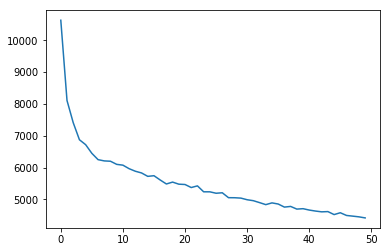

In [28]:
evaluation(lossCallback)